a)

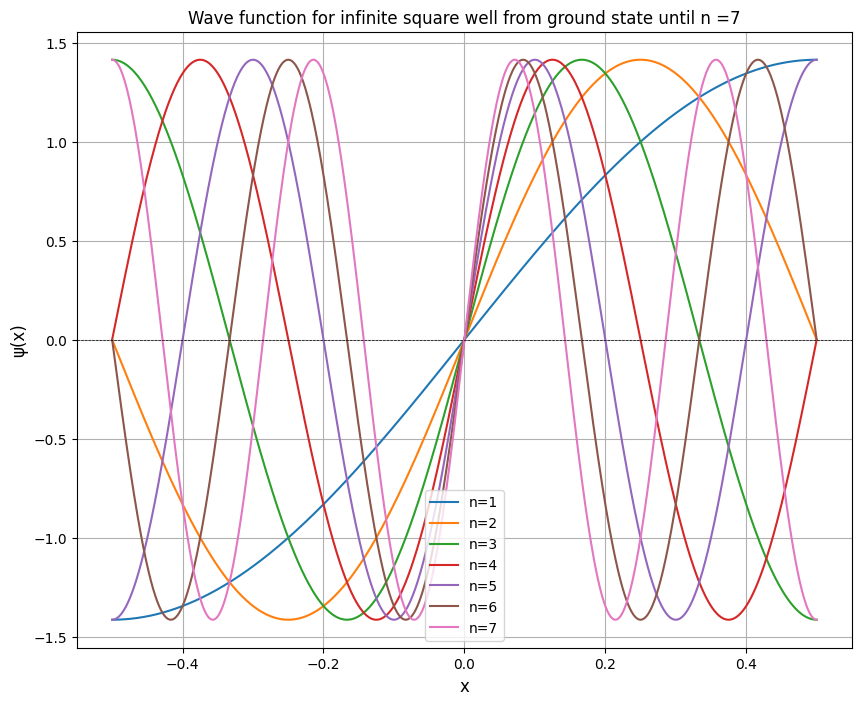

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin

#define constant a
a=1.0
x=np.linspace(-0.5,0.5,1000)

#define wave function
def psi(x,n,a):
    return np.sqrt(2/a)*np.sin(n*np.pi*x/a)

#plotting wave function
plt.figure(figsize=(10,8))
for n in range(1,8): 
     plt.plot(x,psi(x,n,a), label=f'n={n}')
plt.title('Wave function for infinite square well from ground state until n =7')
plt.xlabel("x", fontsize=12)
plt.ylabel("ψ(x)", fontsize=12)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(alpha=1.0)
plt.show()



b)

The overall idea in solving the Schrodinger equation (SE) for infinite square well is treating it as boundary value problem and solve numerically using shooting method. The algorithm will be first guessing the eigenvalue of energy and then use finite different method to propagate the wavefunction ψ(x) from one boundary to another. If the guess energy value results in a non-zero ψ(x) at the boundary (x=a), the guess value is adjusted and repeat again until the boundary condition is satisfy for a valid eigenstate ψ(x)=0

We shall go through the codes now!

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
#Given condition h**2/m=1
hbar=1  
m=1     
a=1.0   # Width of the well
N=1000  # Number of points for discretization
dx=2*a/N  # Step size

# Discretized domain
x=np.linspace(-a,a,N)

The ψ(x) is initialised  with zeros but a small non-zero value is assigned to ψ(x1) as the first point to avoid a trivial solution

We have discretised the Schrodinger equation and this allows us to use finite difference method. The propagation formula will relates the value of the ψ(x) from one point to its neighbouring points.

We have the general form of SE in potential well where V(x)=0 inside the well:

$$
\frac{d^2 \psi(x)}{dx^2} = -\frac{2m}{\hbar^2} E \psi(x)
$$

Using finite difference method, the 2nd derivative is replaced with:

$$
\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{dx^2} \approx \frac{d^2\psi(x)}{dx^2}
$$

Obtaining the recurrence relation after rearranging:

$$
\psi_{i+1}=2(1-\frac{mEdx^2}{\hbar^2})\psi_i-\psi_{i-1}
$$

Using this formula, the value of ψ(x) is updated at each points along the grid, solution propagates from left to right

In [9]:
# Define shooting method
def solve_schrodinger(E):
    """
    Solve the Schrödinger equation for a given energy E.
    Returns the wavefunction ψ(x).
    """
    # Initialize wavefunction and its derivative
    psi=np.zeros_like(x)
    psi[1]=1e-5  # Small non-zero initial value to start propagation
    
    # Propagate using finite difference
    for i in range(1,N - 1):
        psi[i+1]=(2*(1-m*E*dx**2/hbar**2)*psi[i]-psi[i-1])
    
    return psi

To minimise the error, the function boundary condition error(E) will computes the error in satisfying the boundary condition ψ(a)=0. 

After solving the SE for a given energy E, the value of the ψ(x) at the right boundary x=a is returned

In [10]:
# Boundary condition error
def boundary_condition_error(E):
    psi=solve_schrodinger(E)
    return psi[-1]


Here the function find_eigenvalues(num_levels) will find the first (num_levels)eigenvalues iteratively using shooting method

(guesses) defines the initial guesses for the energy eigenvalues and we are using a wide range of guesses from 1 to 200 with large numbers of points to give 10000 guesses. The guesses will help us find all the eigenvalues.

With shooting method, the logic behind is to check when the boundary condition error changes sign between two consecutive guesses. The sign changing indicates a zero crossing and thus a valid eigenvalues lies in between those two guesses.

When the error changes sign (error1*error2<0), we compute the midpoint between the two guesses as the corresponding eigenvalue and append it to the list of eigenvalues

This loop will continues until (num_levels) amount of eigenvalues is found.

In [11]:

def find_eigenvalues(num_levels):
    eigenvalues = []
    guesses=np.linspace(1,200,10000)  # More energy guesses with a larger range
    
    for i in range(len(guesses)-1):
        error1=boundary_condition_error(guesses[i])
        error2=boundary_condition_error(guesses[i+1])
        
        # Check if there's a sign change (crossing zero)
        if error1*error2<0:
            eigenvalues.append((guesses[i]+guesses[i+1])/2)
        
        if len(eigenvalues)==num_levels:  # Stop if enough eigenvalues are found
            break
    
    return eigenvalues



Using the given analytical solution for eigenvalues:

$$
E_n=\frac{\hbar^2\pi^2n^2}{8ma^2}
$$

we compute the first (num_levels) of eigenvalues for comparison with the shooting method

The analytical eigenvalues for energy is printed side by side with the eigenvalues obtained using shooting method for comparison. The ψ(x) for first few eigenstate are plotted with normalisation by its maximum value.

Level     Analytical (E_n)    Shooting Method (E_n)
1         1.233701            1.228873            
2         4.934802            4.950545            
3         11.103305           11.120162           
4         19.739209           19.777528           
5         30.842514           30.902740           
6         44.413220           44.495800           


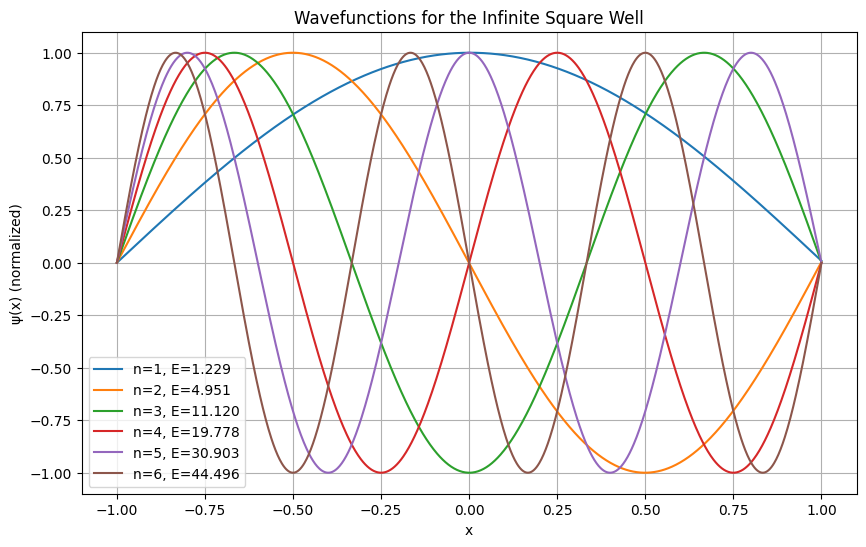

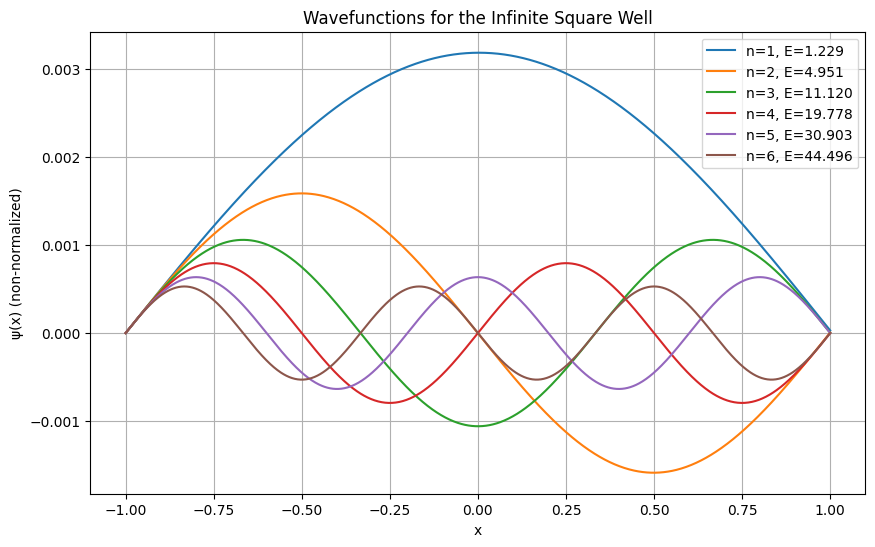

In [12]:
# Analytical eigenvalues
def En(n,a):
    return (hbar**2*np.pi**2*n**2)/(8*m*a**2)

# Compute eigenvalues
num_levels=6
numerical_eigenvalues=find_eigenvalues(num_levels)
analytical_eigenvalues=[En(n,a) for n in range(1,num_levels+1)]

# Display comparison
print(f"{'Level':<10}{'Analytical (E_n)':<20}{'Shooting Method (E_n)':<20}")
for n in range(num_levels):
    print(f"{n+1:<10}{analytical_eigenvalues[n]:<20.6f}{numerical_eigenvalues[n]:<20.6f}")

# Plot the wavefunctions for the first few eigenstates
plt.figure(figsize=(10, 6))
for i,E in enumerate(numerical_eigenvalues):
    psi = solve_schrodinger(E)
    plt.plot(x,psi/np.max(np.abs(psi)), label=f"n={i+1}, E={E:.3f}")

plt.xlabel("x")
plt.ylabel("ψ(x) (normalized)")
plt.title("Wavefunctions for the Infinite Square Well")
plt.legend()
plt.grid()
plt.show()

# Plot the non-normalized wavefunctions
plt.figure(figsize=(10, 6))
for i, E in enumerate(numerical_eigenvalues):
    psi = solve_schrodinger(E)
    plt.plot(x, psi, label=f"n={i + 1}, E={E:.3f}")

plt.title("Wavefunctions for the Infinite Square Well")
plt.xlabel("x")
plt.ylabel("ψ(x) (non-normalized)")
plt.legend()
plt.grid()
plt.show()